In [29]:
from pathlib import Path
import skimage
from skimage import io
from skimage.transform import resize
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage.filters import unsharp_mask
import os
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [12]:
def unsharpmask_factor(fileID, band):
    fires = np.load(fileID);
    height, width = fires.shape
    smallFires = resize(fires, (round(height/2), round(width/2)))
    blurryFires = resize(smallFires, (height, width))
    
    table = []
    n = 1
    while n <= 2:
        sharpened_img = unsharp_mask(blurryFires, radius=1, amount=n)
        controlmae = mean_absolute_error(fires, blurryFires)
        controlrmse = mean_squared_error(fires, blurryFires, squared=False)
        mae = mean_absolute_error(fires, sharpened_img)
        rmse = mean_squared_error(fires, sharpened_img, squared=False)
        table.append({'Filename': fileID,'Band': band,'Factor': n, 'Control MAE': controlmae, 'Control RMSE': controlrmse, 'MAE': mae, 'RMSE': rmse})
        n += .1
    
    return pd.DataFrame(table)

In [21]:
unsharpmask_factor('../GOES_Files/test_files/difference.npy','bt')

,Filename,Band,Factor,Control MAE,Control RMSE,MAE,RMSE
0,../GOES_Files/test_files/difference.npy,bt,1.0,0.670047,0.970412,12.496539,14.084000
1,../GOES_Files/test_files/difference.npy,bt,1.1,0.670047,0.970412,12.496500,14.083999
2,../GOES_Files/test_files/difference.npy,bt,1.2,0.670047,0.970412,12.496478,14.083998
3,../GOES_Files/test_files/difference.npy,bt,1.3,0.670047,0.970412,12.496469,14.083999
4,../GOES_Files/test_files/difference.npy,bt,1.4,0.670047,0.970412,12.496476,14.083998
5,../GOES_Files/test_files/difference.npy,bt,1.5,0.670047,0.970412,12.496501,14.083999
6,../GOES_Files/test_files/difference.npy,bt,1.6,0.670047,0.970412,12.496543,14.084001
7,../GOES_Files/test_files/difference.npy,bt,1.7,0.670047,0.970412,12.496599,14.084003
8,../GOES_Files/test_files/difference.npy,bt,1.8,0.670047,0.970412,12.496675,14.084009
9,../GOES_Files/test_files/difference.npy,bt,1.9,0.670047,0.970412,12.496770,14.084014


In [30]:
def unsharpmask_files(path):
    table = []
    for file in os.listdir(path):
        #try:
            #img = np.load(path + file)
        img = io.imread(path+file);
        img = np.squeeze(img[:,:,0])
        band = file[19:21]
        height, width = img.shape
        smallimg = resize(img, (round(height/2), round(width/2)))
        blurryimg = resize(smallimg, (height, width))
        sharpimg = unsharp_mask(blurryimg, radius=1, amount=1)

        controlmae = mean_absolute_error(img, blurryimg)
        controlrmse = mean_squared_error(img, blurryimg, squared=False)
        mae = mean_absolute_error(img, sharpimg)
        rmse = mean_squared_error(img, sharpimg, squared=False)
        table.append({'File': file, 'Band': band, 'Control MAE': controlmae, 'Control RMSE': controlrmse, 'MAE': mae, 'RMSE': rmse})
#         except:
#             print(file)
    return pd.DataFrame(table)

In [35]:
img = io.imread('../../GOES_Files/png_files/OR_ABI-L1b-RadC-M3C07_G17_s20183171802219_e20183171805003_c20183171805037.png');
file = ('OR_ABI-L1b-RadC-M3C07_G17_s20183171802219_e20183171805003_c20183171805037.png')
img = np.squeeze(img[:,:,0])
band = file[19:21]
height, width = img.shape
smallimg = resize(img, (round(height/2), round(width/2)))
blurryimg = resize(smallimg, (height, width))
sharpimg = unsharp_mask(blurryimg, radius=1, amount=1)

controlmae = mean_absolute_error(img, blurryimg)
controlrmse = mean_squared_error(img, blurryimg, squared=False)
mae = mean_absolute_error(img, sharpimg)
rmse = mean_squared_error(img, sharpimg, squared=False)
#table.append({'File': file, 'Band': band, 'Control MAE': controlmae, 'Control RMSE': controlrmse, 'MAE': mae, 'RMSE':rmse})

In [41]:
print(mae)

39.23557359391129


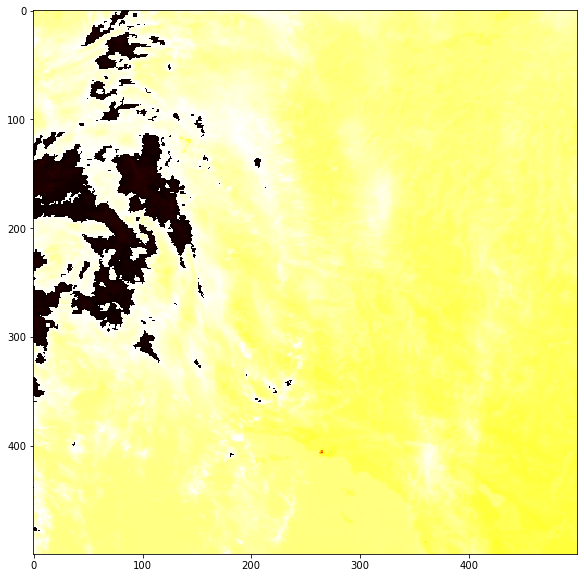

In [38]:
sharpimg

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot()
ax.imshow(img, origin='upper',
           interpolation='none',
           cmap = 'hot_r')

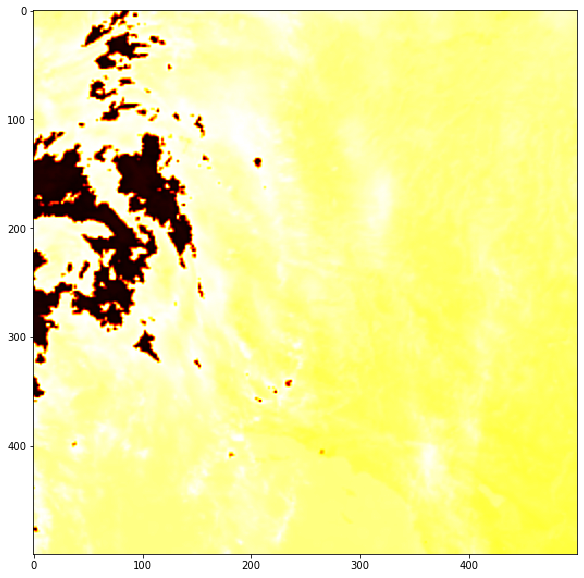

In [37]:
sharpimg

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot()
ax.imshow(sharpimg, origin='upper',
           interpolation='none',
           cmap = 'hot_r')

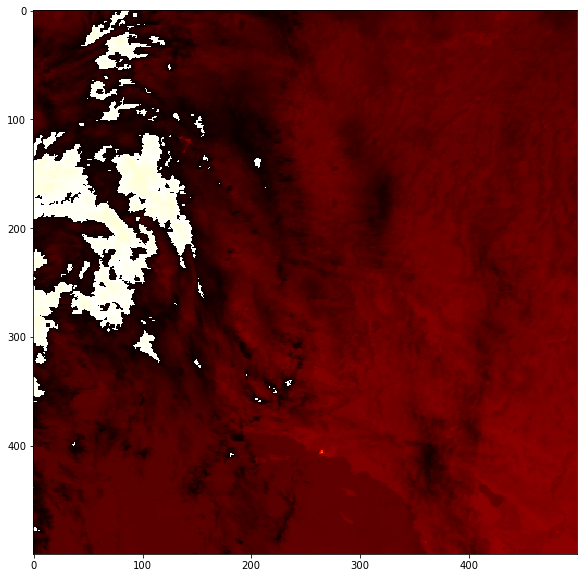

In [40]:
diff = sharpimg - img

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot()
ax.imshow(diff, origin='upper',
           interpolation='none',
           cmap = 'hot_r')

In [36]:
%matplotlib inline

In [31]:
x = unsharpmask_files('../../GOES_Files/png_files/')
agg_function = {'Control MAE': 'mean', 'Control RMSE': 'mean', 'MAE': 'mean', 'RMSE': 'mean'}
y = x.groupby(x['Band']).agg(agg_function)
y

,Control MAE,Control RMSE,MAE,RMSE
Band,,,,
07,38.392619,45.534162,38.392474,45.531986
14,50.245357,70.366842,50.245002,70.361282


In [34]:
def unsharpmask_bt(path):
    table = []
    for file in os.listdir(path):
        band = file[19:21]
        if band == '07':
            try:
                file14 = file[:19] + '14' + file[21:41]
                for x in os.listdir(path):
                    if x.startswith(file14):
                        file14 = x
                img07 = np.load(path + file)
                img14 = np.load(path + file14)
                img = img07 - img14
            
                height, width = img.shape
                smallimg = resize(img, (round(height/2), round(width/2)))
                blurryimg = resize(smallimg, (height, width))
                sharpimg = unsharp_mask(blurryimg, radius=1, amount=1)
                
                controlmae = mean_absolute_error(img, blurryimg)
                controlrmse = mean_squared_error(img, blurryimg, squared=False)
                mae = mean_absolute_error(img, sharpimg)
                rmse = mean_squared_error(img, sharpimg, squared=False)
                table.append({'File': file, 'Control MAE': controlmae, 'Control RMSE': controlrmse, 'MAE': mae, 'RMSE': rmse})
            except:
                print(file)
                pass
    return pd.DataFrame(table)

In [35]:
x = unsharpmask_bt('../GOES_Files/npy_files/')
agg_function = {'Control MAE': 'mean', 'Control RMSE': 'mean', 'MAE': 'mean', 'RMSE': 'mean'}
y = x.agg(agg_function)
y

OR_ABI-L1b-RadC-M3C07_G17_s20183191902189_e20183191904573_c20183191904597.npy


Control MAE      0.646763
Control RMSE     1.031476
MAE              9.288494
RMSE            11.279556
dtype: float64